In [43]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [44]:
# Tugas Nomor 1
# baca data dari file CSV
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Tugas Nomor 1

Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Jawaban :
Variabel bebas : age, sex, bmi, children, smoker
variabel target : charges

In [45]:
# Tugas Nomor 1
# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


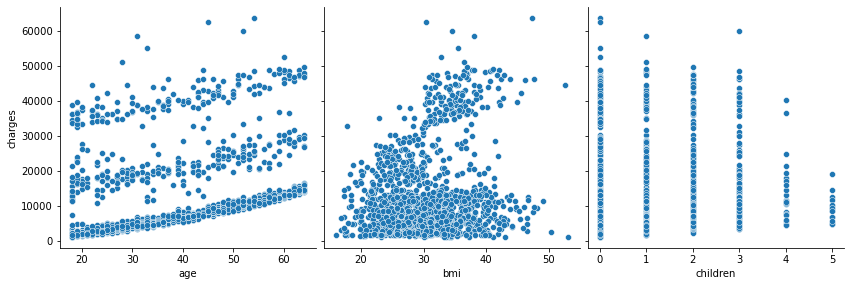

In [46]:
# Tugas Nomor 2
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex']) 
data['smoker'] = le.fit_transform(data['smoker']) 

sns.pairplot(data, x_vars=['age','bmi', 'children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

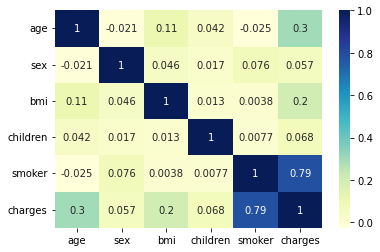

In [47]:
# Tugas Nomor 2
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [48]:
# Tugas Nomor 2
# memisahkan variabel bebas (x) dan variabel target target (y)
X = data[['age', 'sex', 'bmi', 'children','smoker']]
y = data['charges']
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [49]:
# Tugas Nomor 2
# Pembagian data latih dan data uji dengan proporsi 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
# Tugas Nomor 2
# menampilkan jumlah baris dalam setiap subset
print("Jumlah data latih: ", len(X_train))
print("Jumlah data uji: ", len(X_test))

Jumlah data latih:  936
Jumlah data uji:  402


In [51]:
# Tugas Nomor 3
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [56]:
# Tugas Nomor 4
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [57]:
# Tugas Nomor 5
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [59]:
# Tugas Nomor 6
# Menghitung MAE
mae = mean_absolute_error(y_test, y_test_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_test_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_test_pred)

# Mencetak hasil matriks
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 3896.0787054694856
MSE: 31929596.873382192
RMSE: 5650.628006990213
R-squared: 0.7800956964404813
